# Preliminary studies --> the working version

**!!! The deal was: !!!** the time window has to be constant for both the beams, else it will pump energy somewhere in the spectrum because of the periodicity assumption in the DFT

CAVEAT:
arrays here are ~2^30 long, so first think and then evaluate the cell

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def current(x, N, mu, sig):
    from scipy.constants import e
    return e*N/((sig*np.sqrt(np.pi*2))) * np.exp(-0.5*((x-mu)/sig)**2)

def dB(x):
    return 20*np.log10(x)

# Test with sinusoids

In [5]:
def doFFT(t, y):
    assert t.size == y.size
    dt = np.abs(t[1]-t[0])
    N_sample = t.size
    
    norm = 2/N_sample
    
    s_fft = norm*np.abs(np.fft.fft(y))
    f_fft = np.fft.fftfreq(N_sample, d=dt)
    df = np.abs(f_fft[1]-f_fft[0])

    return f_fft, s_fft

In [ ]:
tt = np.linspace(-10e-3, 10e-3, 2**14)
y1 = 1*np.sin(tt*2*np.pi*1e3)
y2 = 10*np.sin(tt*2*np.pi*0.5e3)
y3 = 100*np.sin(tt*2*np.pi*2e3+np.pi)

yy = y1+y2+y3

plt.plot(tt,yy)

In [ ]:
ff, sf = doFFT(tt,yy)

plt.plot(ff, dB(sf))
plt.xlim(1e2, 1e4)
plt.ylim(-10,41)
plt.xscale('log')
plt.grid(which='both')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')

# check the invariance for number of samples

In [ ]:
tt1 = np.linspace(-10e-3, 10e-3, 2**14)
y1 = 1*np.sin(tt1*2*np.pi*1e3)
tt2 = np.linspace(-10e-3, 10e-3, 2**20)
y2 = 1*np.sin(tt2*2*np.pi*1e3)

In [ ]:
f1, sf1 = doFFT(tt1, y1)
plt.plot(f1, dB(sf1))
plt.xlim(1e2, 1e4)
plt.ylim(-10,41)
plt.xscale('log')
plt.grid(which='both')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
print(np.max(dB(sf1)))

In [ ]:
f2, sf2 = doFFT(tt2, y2)
plt.plot(f2, dB(sf2))
plt.xlim(1e2, 1e4)
plt.ylim(-10,41)
plt.xscale('log')
plt.grid(which='both')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
print(np.max(dB(sf2)))

# A beam prototype

In [ ]:
sigma_p = 0.25e-9
sigma_e = 0.25e-12
Np = 3e11
Ne = 1e9

tscale = np.linspace(-10*sigma_p, 10*sigma_p, 2**25)

In [ ]:
np.abs(tscale[1]-tscale[0])

In [ ]:
dt = np.abs(tscale[1]-tscale[0])
yy_p = current(tscale, Np, 0., sigma_p)
yy_e = current(tscale, Ne, 0., sigma_e)

In [ ]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(1e9*tscale, yy_e,label='Electrons')
ax.plot(1e9*tscale, yy_p,label='Protons')
ax.set_xlim(-1,1)
# ax.set_ylim(-50,30)
# ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Current (A)')
ax.set_xlabel('Time (ns)')
ax.legend(frameon=True)
plt.savefig('ideal_time_domain.png',format='png',dpi=300)

In [ ]:
ff_p, sf_p = doFFT(tscale,yy_p)
ff_e, sf_e = doFFT(tscale,yy_e)

In [ ]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(ff_e, dB(sf_e),label='Electrons')
ax.plot(ff_p, dB(sf_p),label='Protons')
ax.set_xlim(1e8, 2e12)
ax.set_ylim(-50,30)
ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Magnitude (dB)')
ax.set_xlabel('Frequency (Hz)')
ax.legend(frameon=True)
plt.savefig('ideal_freq_domain.png',format='png',dpi=300)

# Some more beams for the presentation

In [ ]:
def coulomb_to_N(charge):
    '''
    Total bunch charge [C] to number of particles per bunch N
    '''
    from scipy.constants import e
    return charge/e

In [ ]:
from scipy.constants import e as unit_charge
(3e11*unit_charge)

In [ ]:
#e- beams
print('N for e- beams (units of 1e9)')
print(coulomb_to_N(600e-12)*1e-9)
print(coulomb_to_N(160e-12)*1e-9)
print(coulomb_to_N(100e-12)*1e-9)
print('Charge for p+ beams')
print(3e11*unit_charge)


In [ ]:
sigma_p = 1e-9
tscale = np.linspace(-10*sigma_p, 10*sigma_p, 2**26)

Np = 3e11
sigma_p = 4e-9/4.
yy_p = current(tscale, Np, 0., sigma_p)

# another variant: proton 1e11, same length
Np_1 = 1e11
sigma_p_1 = 4e-9/4.
yy_p_1 = current(tscale, Np_1, 0., sigma_p_1)

# electron variants
Ne_1 = coulomb_to_N(0.1e-9)
sigma_e_1 = 4e-12/4.
yy_e_1 = current(tscale, Ne_1, 0., sigma_e_1)

Ne_2 = coulomb_to_N(0.6e-9)
sigma_e_2 = 4e-12/4.
yy_e_2 = current(tscale, Ne_2, 0., sigma_e_2)

Ne_3 = coulomb_to_N(0.6e-9)
sigma_e_3 = 6e-12/4.
yy_e_3 = current(tscale, Ne_3, 0., sigma_e_3)

In [ ]:
ff_p, sf_p = doFFT(tscale,yy_p)
ff_p_1, sf_p_1 = doFFT(tscale,yy_p_1)
ff_e_1, sf_e_1 = doFFT(tscale,yy_e_1)
ff_e_2, sf_e_2 = doFFT(tscale,yy_e_2)
ff_e_3, sf_e_3 = doFFT(tscale,yy_e_3)

In [ ]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(ff_e_1, dB(sf_e_1),label='Electrons, 100 pC, 4 ps long')
ax.plot(ff_e_2, dB(sf_e_2),label='Electrons, 600 pC, 4 ps long')
ax.plot(ff_e_3, dB(sf_e_3),label='Electrons, 600 pC, 6 ps long')

ax.plot(ff_p, dB(sf_p),label='Protons, 3e11 ppb, 4 ns long')
ax.plot(ff_p_1, dB(sf_p_1),label='Protons, 1e11 ppb, 4 ns long')

ax.set_xlim(1e8, 2e12)
ax.set_ylim(-50,30)
ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Magnitude (dB)')
ax.set_xlabel('Frequency (Hz)')
ax.legend(frameon=True)
plt.savefig('ideal_various_cases.png',format='png',dpi=300)

# Ideal stipline pickup response
## Protons

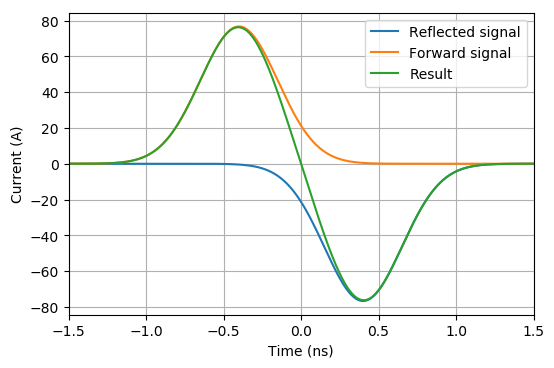

In [11]:
# protons
from scipy.constants import c
Np = 3e11
sigma_p = 1e-9/4.
PU_len = 120e-3*2/c

tscale = np.linspace(-50*sigma_p, 50*sigma_p, 2**25)

signal_neg = current(tscale, Np, -PU_len/2, sigma_p)
signal_pos = -1.*current(tscale, Np, PU_len/2, sigma_p)
yy = signal_pos + signal_neg

fig, ax = plt.subplots(1, dpi=100)
ax.plot(1e9*tscale, signal_pos,label='Reflected signal')
ax.plot(1e9*tscale, signal_neg,label='Forward signal')
ax.plot(1e9*tscale, yy,label='Result')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Current (A)')
ax.set_xlim(-1.5,1.5)
ax.legend(frameon=True)
ax.grid(which='both')
plt.savefig('stripline_p_signals.png',fomat='png',dpi=300)

In [7]:
ff, sf = doFFT(tscale, yy)
ff_fw, sf_fw = doFFT(tscale, signal_neg)

In [8]:
sf_db = dB(sf)
sf_fw_bd = dB(sf_fw)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


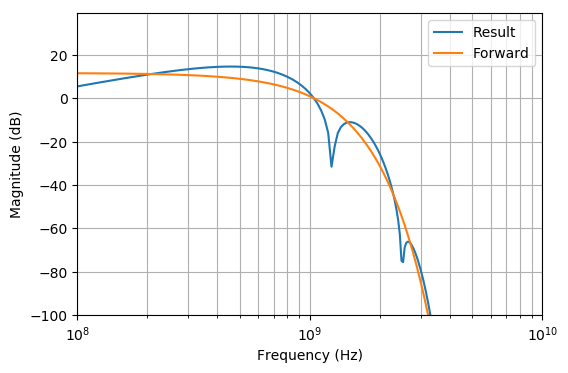

In [9]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(ff, sf_db,label='Result')
ax.plot(ff_fw, sf_fw_bd,label='Forward')

ax.set_xlim(1e8, 1e10)
ax.set_ylim(-100, )
ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Magnitude (dB)')
ax.set_xlabel('Frequency (Hz)')
ax.legend(frameon=True)
plt.savefig('stripline_p_freqs.png',format='png',dpi=300)

## Electrons

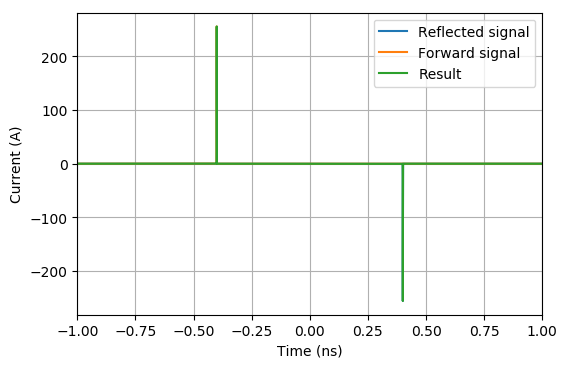

In [25]:
# electrons
from scipy.constants import c
Ne = 1e9
sigma_e = 1e-12/4.
PU_len = 120e-3*2/c

# tscale = np.linspace(-50*sigma_p, 50*sigma_p, 2**25)

signal_neg = current(tscale, Ne, -PU_len/2, sigma_e)
signal_pos = -1.*current(tscale, Ne, PU_len/2, sigma_e)
yy = signal_pos + signal_neg

fig, ax = plt.subplots(1, dpi=100)
ax.plot(1e9*tscale, signal_pos,label='Reflected signal')
ax.plot(1e9*tscale, signal_neg,label='Forward signal')
ax.plot(1e9*tscale, yy,label='Result')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Current (A)')
ax.set_xlim(-1,1)
ax.legend(frameon=True)
ax.grid(which='both')
plt.savefig('stripline_e_signals.png',fomat='png',dpi=300)

In [26]:
ff, sf = doFFT(tscale, yy)
ff_fw, sf_fw = doFFT(tscale, signal_neg)

In [27]:
sf_db = dB(sf)
sf_fw_bd = dB(sf_fw)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


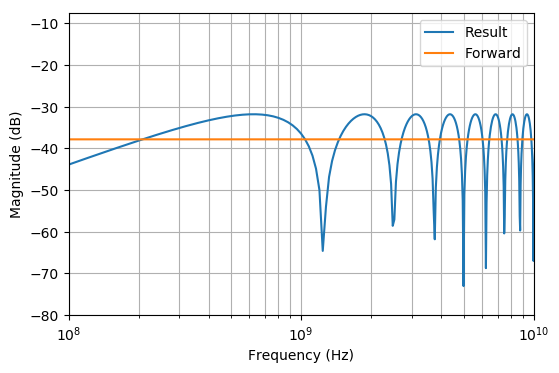

In [28]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(ff, sf_db,label='Result')
ax.plot(ff_fw, sf_fw_bd,label='Forward')

ax.set_xlim(1e8, 1e10)
ax.set_ylim(-80, )
ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Magnitude (dB)')
ax.set_xlabel('Frequency (Hz)')
ax.legend(frameon=True)
plt.savefig('stripline_e_freqs.png',format='png',dpi=300)

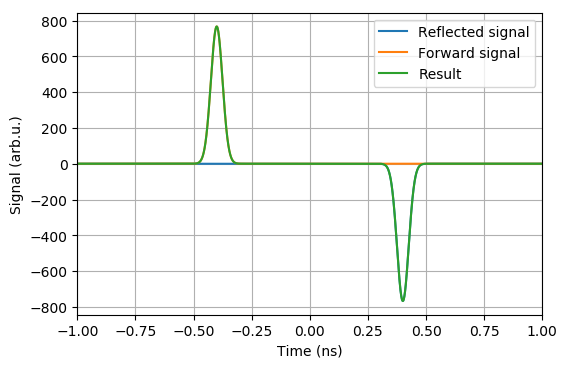

In [23]:
# didactical
from scipy.constants import c
Ne = 3e11
sigma_e = .1e-9/4.
PU_len = 120e-3*2/c

# tscale = np.linspace(-50*sigma_p, 50*sigma_p, 2**25)

signal_neg = current(tscale, Ne, -PU_len/2, sigma_e)
signal_pos = -1.*current(tscale, Ne, PU_len/2, sigma_e)
yy = signal_pos + signal_neg

fig, ax = plt.subplots(1, dpi=100)
ax.plot(1e9*tscale, signal_pos,label='Reflected signal')
ax.plot(1e9*tscale, signal_neg,label='Forward signal')
ax.plot(1e9*tscale, yy,label='Result')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Signal (arb.u.)')
ax.set_xlim(-1,1)
ax.legend(frameon=True)
ax.grid(which='both')
plt.savefig('stripline_didactical_signals.png',fomat='png',dpi=300)

In [19]:
ff, sf = doFFT(tscale, yy)
ff_fw, sf_fw = doFFT(tscale, signal_neg)

In [20]:
sf_db = dB(sf)
sf_fw_bd = dB(sf_fw)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


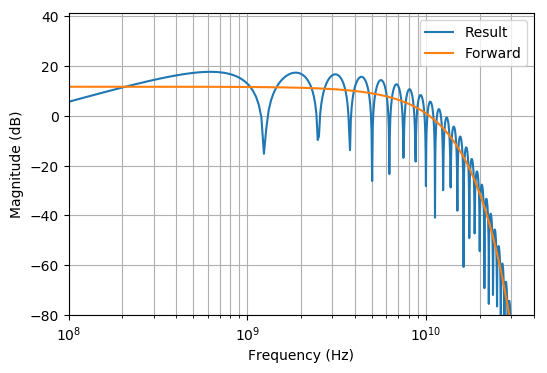

In [24]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(ff, sf_db,label='Result')
ax.plot(ff_fw, sf_fw_bd,label='Forward')

ax.set_xlim(1e8, 4e10)
ax.set_ylim(-80, )
ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Magnitude (dB)')
ax.set_xlabel('Frequency (Hz)')
ax.legend(frameon=True)
plt.savefig('stripline_didactical_freqs.png',format='png',dpi=300)